# Audio-Processing: Baby Steps
|                |                                       |
| ---------------- | --------------------------------------- |
| ![Eu não vou falar sobre o aparelho auditivo](pictures/no-talk-about.png) | ![proibido](pictures/ear.jpeg) |



#### Introduction

##### Onda Sonora

É a propagação de uma "onda mecanica acustica", sé uma onda longitudinal(**1) de forma cincuncêntrica, essa onda viaja somente por meios materiais (sólidos, liquidos ou gasosos). [wiki Ondas_longitudinais](https://pt.wikipedia.org/wiki/Ondas_longitudinais)

Se ao ouvir um som natural podemos ter o desejo de ouvi-lo novamente a qualquer momento através de uma gravação.

Para isso precisamos capturá-lo usando um dispositivo. O equipamento utilizado para converter sinal analógico em sinal digital é chamado conversor AD.

|                |                                       |
| ---------------- | --------------------------------------- |
| imagem de um conversor AD | ![Conversor AD](pictures/ad.png) |

<p></p>

O Conversor processa uma amostra do som a uma taxa de dezenas de milhares de vezes por segundo.
Nesse processo de conversão o audio sofre perdas, quando convertido do domínio continuo(infinito) para o discreto(finito) e dessa forma pode ser armazenado.
Esse processo de conversão atingiu um grau elevado de precisão que essa perda não é percebida.

![continuous vs discrete](pictures/cont_desc.jpg)

##### Audio Digital

* Audio digital, consiste na representação digital de uma onda sonora por meio de uma sequência binaria.
  * Aplicação: Armazenamento e reprodução por meio de diversas midias: cd, internet, wav, mp3.
* Com a conversão do analógico para o digital nasceu o Processamento de Sinais Digitais, DSP. Digital Signal Processing.
* O que é processamento de sinais de audio?
  * é toda alteração intencional em um sinal de audio.

Exemplos de aplicações:

* sintese sonora (Sound Syntesis)
  * É a criação artificial de um sinal de audio, você pode reproduzir um som da natureza, um instrumento musical
* Compressão de Audio
  * Algoritmos de Compressão podem reduzir  o tamanho dos arquivos sem comprometer a qualidade. mp3, aac, vorbis. ou o Flac sem perda.
* Filtros
  * Tecnica usada para modificar a frequencia de um audio.
    A equalização é um tipo básico de filtro, é possível ajustar a frequencia de vários componentes do audio, como os médios, graves e agudos.
* Efeitos de Audio
  reverb, delay, flanger, chorus.

![efeitos de guiarra](pictures/guitar-pedals.jpg)

<p></p>

* Processamentos de Voz
  * Afinar a voz em tempo real, clonar uma pessoa.

#### Simulando a conversão Analógica/Digital

##### Gerando uma onda senoide

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
amplitude = .8
frequencia = 2
fase_inicial = np.pi/2

taxa_amostragem = 100
tempo = np.arange(-1, 1, 1.0/taxa_amostragem)
x = amplitude * np.cos(2*np.pi*frequencia*tempo+fase_inicial)

Text(0, 0.5, 'amplitude')

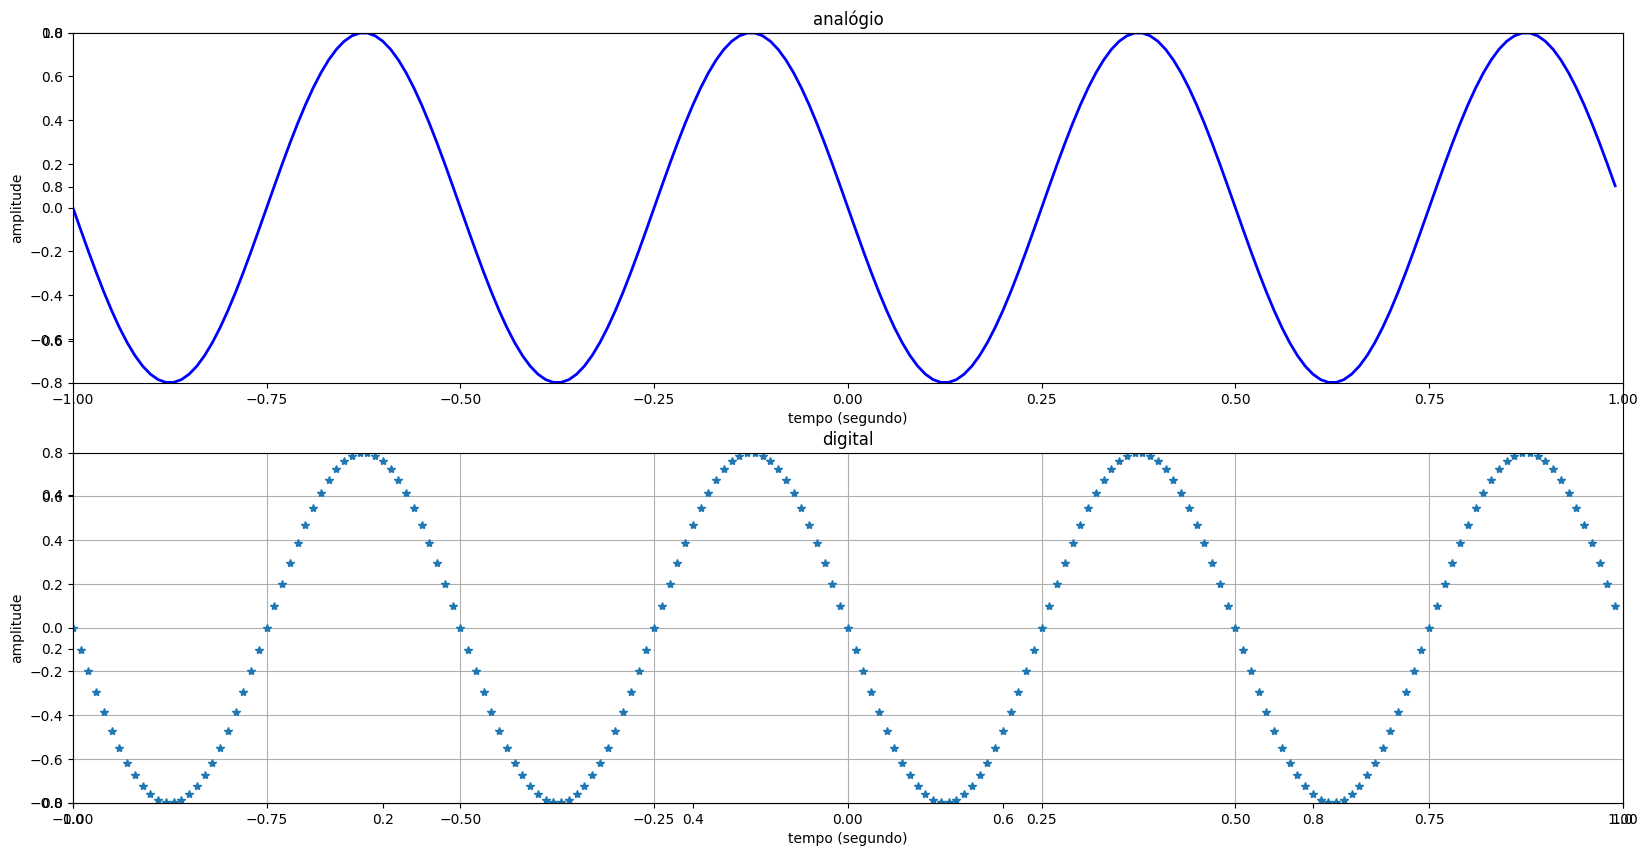

In [4]:
plt.subplots(figsize=(20, 10))

ax1=plt.subplot(2, 1, 1)
ax1.plot(tempo, x, 'b',lw=2)
plt.axis([-1,1,-0.8,0.8])
ax1.set_title('analógio')
ax1.set_xlabel('tempo (segundo)')
ax1.set_ylabel('amplitude')

ax2=plt.subplot(212, sharex=ax1)
ax2.plot(tempo, x, '*', lw=2)
plt.axis([-1,1,-0.8,0.8])
plt.grid(True)
plt.title('digital')
plt.xlabel('tempo (segundo)')
plt.ylabel('amplitude')

## Primeira Intuição


|                |                                       |
| ---------------- | --------------------------------------- |
| **First Step** | ![primeiro passo](pictures/step.jpeg) |

<p></p>

> ### Algumas das propriedades do Audio Digital
>
> 1. Taxa de Amostragem (Sample Rate)
> 2. Volume
> 3. Tonalidade (Pitch)
> 4. Duração
<p></p>

----------

<p></p>

> 5. Quantidade de bits (Bit Depth)
> 6. Taxa de Bits (Bit Rate)
> 7. Armazenamento x estrutura de dados
> 8. Frame x Sample x Chunk Size


### Taxa de amostragem -  Sample Rate (sample frequency)

<p>Uma amostra ou sample é o estado original analógico da onda sonora em um certo periodo do tempo</p>
<p>Uma série de amostras conectadas descrevem um trecho de audio</p>

> Taxa de amostragem é o número de amostras por uma medida de tempo(normalmente em segundos), quando estamos captando um sinal continuo eanalógio para um sinal discreto e digital.

A `taxa de amostragem` também é chamada de:
  - Frequencia de amostragem(samplig rate)
  - Taxa de recuperação(recevery rate). 
  - Normalmente medido em HZ hertz. **41.200Hz**

In [5]:
amplitude = .8
frequencia = 440
fase_inicial = np.pi
duracao = 1

taxa_amostragem = 44100
tempo1 = np.arange(start=0, stop=duracao, step=duracao/taxa_amostragem, dtype=np.float32)
tempo2 = np.linspace(start=0, stop=duracao, num=duracao*taxa_amostragem, endpoint=False, dtype=np.float16)

x1 = amplitude * np.cos(2 * np.pi * frequencia * tempo1 + fase_inicial)
x2 = amplitude * np.cos(2 * np.pi * frequencia * tempo2 + fase_inicial)

print(len(tempo1))
print(len(tempo2))

44100
44100


Text(0, 0.5, 'amplitude')

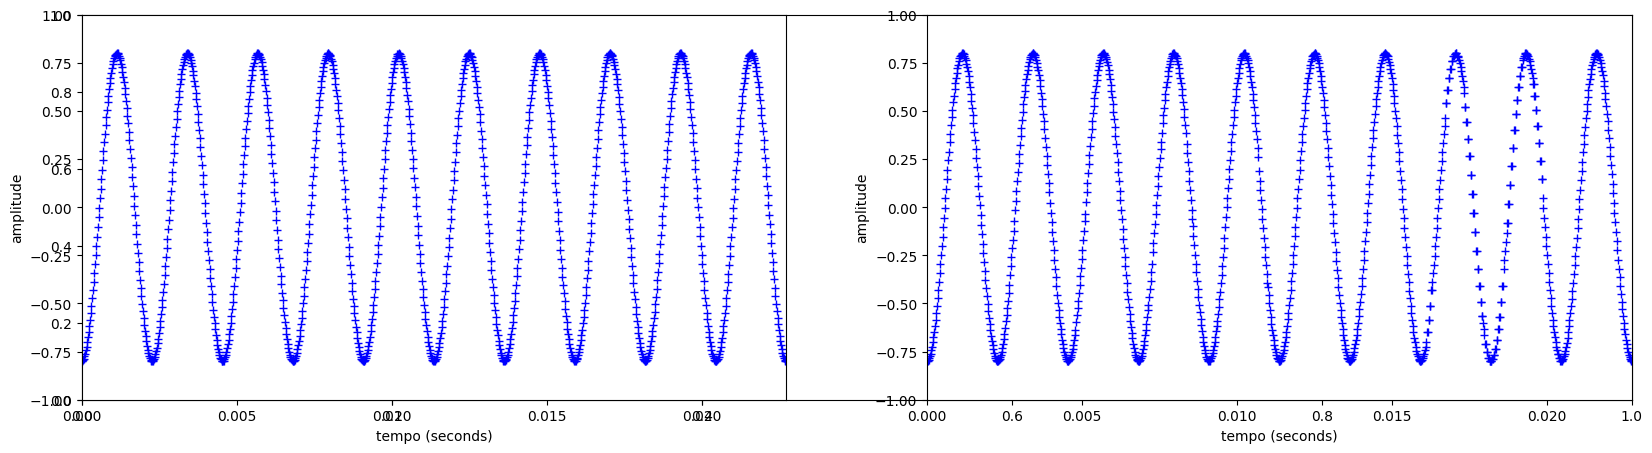

In [6]:
plt.subplots(figsize=(20, 5))
plt.subplot(1,2,1)
plt.plot(tempo1, x1, 'b+', linewidth=2)
plt.axis([-.0, 1/44, -1.0, 1.0])
plt.xlabel('tempo (seconds)')
plt.ylabel('amplitude')

plt.subplot(1,2,2)
plt.plot(tempo2, x2, 'b+', linewidth=2)
plt.axis([-.0, 1/44, -1.0, 1.0])
plt.xlabel('tempo (seconds)')
plt.ylabel('amplitude')


In [7]:
import IPython.display as ipd

ipd.display(ipd.Audio(data=x1, rate=taxa_amostragem))
ipd.display(ipd.Audio(data=x2, rate=taxa_amostragem))

In [8]:
def draw_wave(tempo, audio, style, duracao, zoom, amplitude):
    plt.plot(tempo, audio, style, linewidth=2)
    plt.axis([-.0, duracao/zoom, -amplitude, amplitude])
    plt.xlabel('tempo (seconds)')
    plt.ylabel('amplitude')

In [9]:
def create_audio(amplitude, frequencia, fase_inicial, duracao, taxa_amostragem):
    vetor_tempo = np.linspace(start=0, stop=duracao, num=duracao*taxa_amostragem, endpoint=False)
    two_phi = 2 * np.pi

    x = amplitude * np.cos( two_phi * frequencia * vetor_tempo + fase_inicial)
    return vetor_tempo, x

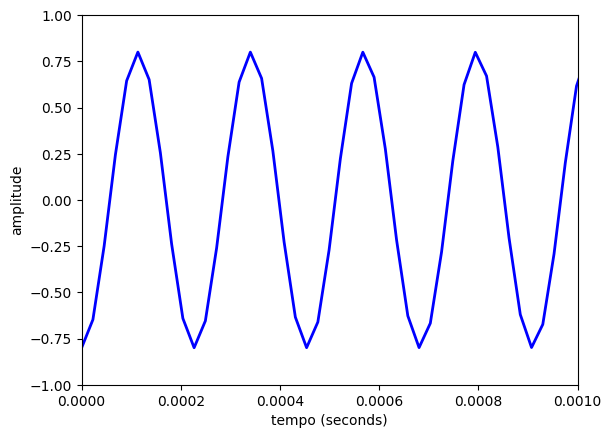

In [10]:
amplitude = .8
frequencia = 4400
fase_inicial = np.pi
duracao = 1
taxa_amostragem = 44100

tempo, audio = create_audio(amplitude, frequencia, fase_inicial, duracao, taxa_amostragem)
ipd.display(ipd.Audio(data=audio, rate=taxa_amostragem))
draw_wave(tempo, audio, 'b', duracao, 1000, amplitude+.2)

| Sample Rate | Mais usado em | OBS |
| ------------- | ------------- | ------------- |
| 8.000 Hz    | ligações telefonicas, walkie-talkie, e transmissões wireless |  |
| 11.025 Hz   | format PCM de menor qualidade, áudio MPEG e análise de subfaixas de subwoofer | Um quarto da taxa de amostragem de CDs de áudio |
| 16.000 Hz   | Extensão da frequência de banda larga sobre o padrão de 8.000 Hz para telefones Usado na maioria dos produtos modernos |  |
| 22.050 Hz   | usado para PCM de menor qualidade, áudio MPEG e análise em baixa frequência | Metade da taxa de amostragem de CDs de áudio |
| 32.000 Hz   | Usado em videocassetes digitais miniDV, fitas de vídeo com canais adicionais de áudio, DAT (modo LP), microfones sem fio digitais de alta qualidade |  |
| 44.056 Hz   | Usado por áudio digital sincronizado a sinais de vídeo coloridos NTSC |  |
| 44.100 Hz   | Padrão para CD de áudio, também amplamente usado com áudio MPEG-1 (VCD, SVCD, MP3) |  |
| 48.000 Hz   | Taxa padrão de amostragem de áudio usada em equipamentos de vídeo digital profissional, como gravadores de fita, servidores de vídeo e mesas de mixagem. | Frequência comum em equipamentos de áudio profissional |

[wiki Sampling](https://en.wikipedia.org/wiki/Sampling_(signal_processing)

#### **Volume**

É a amplitude de uma onda sonora, uma amplituda alta, produz sons mais altos, enquanto baixas amplitudos sons mais baixos.

In [11]:
seconds = 3.0
taxa_amostragem = 22050
tonalidade = 440

amplitude_variavel = np.logspace(-3, 0, int(seconds*taxa_amostragem), endpoint=False, base=10.0)

tempo_array = np.linspace(0, seconds, int(seconds*taxa_amostragem), endpoint=False)
audio = amplitude_variavel*np.sin(2* np.pi * tonalidade * tempo_array)

Text(0, 0.5, 'amplitude')

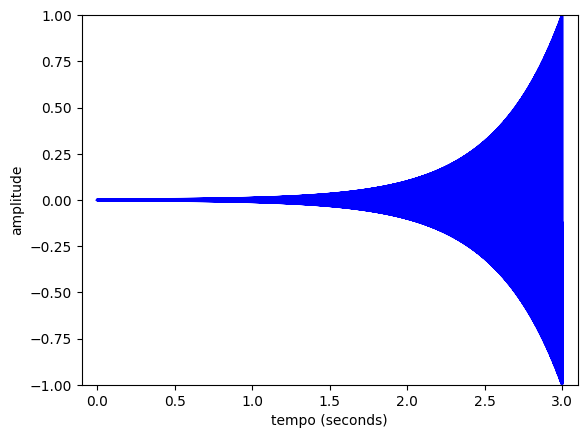

In [12]:
ipd.display(ipd.Audio(data=audio, rate=taxa_amostragem))

plt.plot(tempo_array, audio, 'b',lw=2)
plt.axis([-0.1, 3.1, -1.0, 1.0])
plt.xlabel('tempo (seconds)')
plt.ylabel('amplitude')


In [13]:
def compute_power_db(x, Fs, win_len_sec=0.1, power_ref=10**(-12)):
    win_len = round(win_len_sec * Fs)
    win = np.ones(win_len) / win_len
    power_db = 10 * np.log10(np.convolve(x**2, win, mode='same') / power_ref)
    return power_db

win_len_sec = 0.2
power_db = compute_power_db(audio, Fs=taxa_amostragem, win_len_sec=win_len_sec)

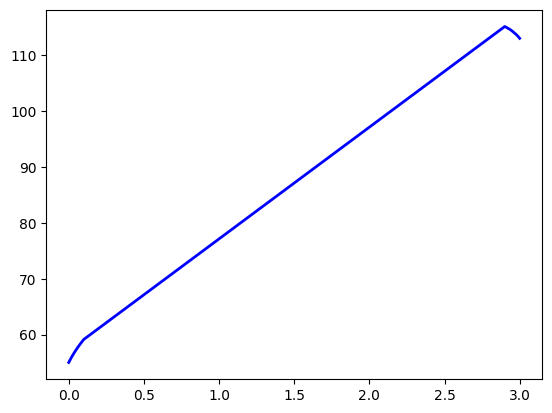

In [14]:
plt.plot(tempo_array, power_db, 'b',lw=2)

#### **Tonalidade** - Pitch

É a frequencia das ondas sonoras, altas frequencias produzem valores mais altos, baixas frequências produzem valores mais baixos

In [15]:
def draw_subplot(data1, x1, data2, x2):
    plt.subplots(figsize=(20, 5))
    plt.subplot(1,2,1)
    plt.plot(data1, x1, 'b+', linewidth=2)
    plt.axis([-.0, 1/100, -1.0, 1.0])
    plt.xlabel('tempo (seconds)')
    plt.ylabel('amplitude')

    plt.subplot(1,2,2)
    plt.plot(data2, x2, 'b+', linewidth=2)
    plt.axis([-.0, 1/100, -1.0, 1.0])
    plt.xlabel('tempo (seconds)')
    plt.ylabel('amplitude')

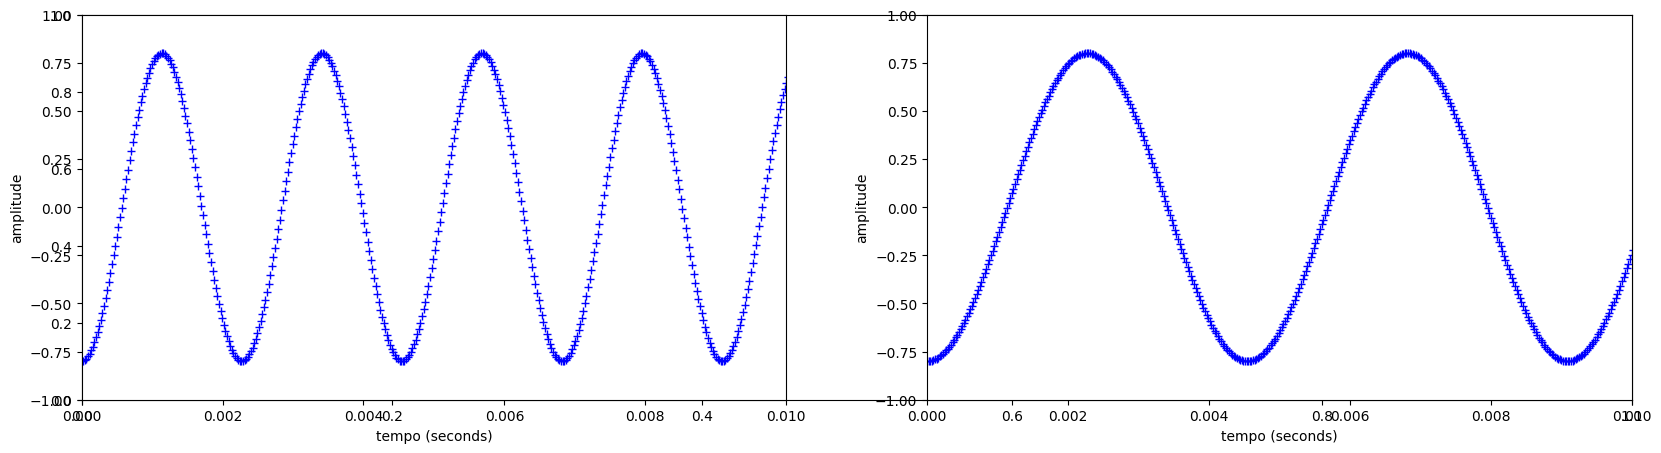

In [16]:
amplitude = .8
frequencia = 440
fase_inicial = np.pi
duracao = 1
taxa_amostragem = 44100

tempo1, audio1 = create_audio(amplitude, frequencia, fase_inicial, duracao, taxa_amostragem)
tempo2, audio2 = create_audio(amplitude, frequencia//2, fase_inicial, duracao, taxa_amostragem)

ipd.display(ipd.Audio(data=audio1, rate=taxa_amostragem))
ipd.display(ipd.Audio(data=audio2, rate=taxa_amostragem))
draw_subplot(tempo1, audio1, tempo2, audio2)

#### **Bit Depth** - Subchunk Size
  * Indica o número de bits usado para representar cada sample
  * Maiores valores de bit depth permitem uma representação maior da amplitude do audio
  * No pão nosso de cada dia significa as tipagens: int16, int24, int32, float16, float, double

<p> </p>

| Type | BIT Depth | # of possible values | min ~ max |
| ------ | ------ | ----------------------------------- | ------- |
| int/float | 32-bit | 4,294,967,296 | -2147483648 ~ +2147483647 |
| signed short | 16-bit | 65,536 | -32768 ~ +32767 |
| float16 | 16-bit | ??? | -1 ~ +1 |
| char | 8-bit | 256 | 0 ~ 255 |

#### **Bit Rate**
É a quantidade de bits processados em uma unidade de tempo(segundos/minutos/horas)
Ele é o produto da taxa de amostragem, da profundidade de bits e do número de canais
normalmente representado em kbps ou Mbps

In [17]:
numero_canais = 1
milisegundos = 1000

bit_rate = (taxa_amostragem * 32 * numero_canais)/milisegundos
bit_rate

1411.2

#### **Duration**

É a duração total do arquivo em horas, minutos, segundos...

* Byte array for PCM data
* duration = (byte_lenght * bit_depth) / bit_rate

In [18]:
bit_len = len(tempo1)*32
(bit_len / bit_rate)

1000.0

In [19]:
bit_rate2 = (taxa_amostragem * 16 * numero_canais)/milisegundos

bit_len = len(tempo2)*16
(bit_len / bit_rate2)

1000.0

#### **Frames e Samples**
<p>Sample é a menor porção de um audio, ele representa parte uma onda em um ponto específico do tempo. Se o bit-depth for um float16, então um sample tera 16bits</p>

<p> O Frame( sample frame ) é o conjunto de amostras de todos os canais em um ponto específico do tempo.</p>

> Frame possui um sample de cada canal.
  * Um Frame Stereo possui 2 samples, Um Frame 5.1 possui 6 samples.
  * Frame Size = bit_depth * channel_count
  <p></p>
  <p></p>

  > Se eu tenho 1 segundo de audio 44100hz mono, significa que eu tenho 44100 samples e 44100 frames.

  > Se eu tenho 1 segundo de audio 44100hz stereo, significa que eu tenho 88200 samples, mas o meu frame size ainda é 44100.
   * frames = 44100
   * samples = 88200
   * [basic-concepts](https://developer.mozilla.org/en-US/docs/Web/API/Web_Audio_API/Basic_concepts_behind_Web_Audio_API)

  ##### Chunk-size - ou buffer.
   São os dados que enviamos para a placa de audio. Normalmente os valores 512 e 1024 são escolhidos.
<p>
  Um valor menor resulta em menos latência entre as operações, mas se for muito pequeno teremos problemas
  com a taxa de transferência de áudio e o tamanho do barramento do dispositivo de áudio.</p>

> É importante definir um fps, ou quantas vezes por segundo o som será reproduzido.

#### **Canais e trilhas de audio**
Como os canais são representados de forma sequencial no array

Basicamente vamos falar sobre mono e stereo.
O som mono tem um canal de audio, e o stereo tem dois, esquerda e direita.
Para um som de um segundo a 44100Hz:

* Um som mono vai ter 44100 frames( cada chunk-size de 1024 samples ) 44100/1024 = 43 fps
* Um som stereo vai ter 44100 frames( cada chunk-size de 2048 samples ) 88200/2048 = 43 fps

In [20]:
amplitude = .8
la = 440.00
mi = 329.63
fase_inicial = np.pi
duracao = 1
taxa_amostragem = 44100

left_time, left_audio = create_audio(amplitude, la, fase_inicial, duracao, taxa_amostragem)
right_time, right_audio = create_audio(amplitude, mi, fase_inicial, duracao, taxa_amostragem)

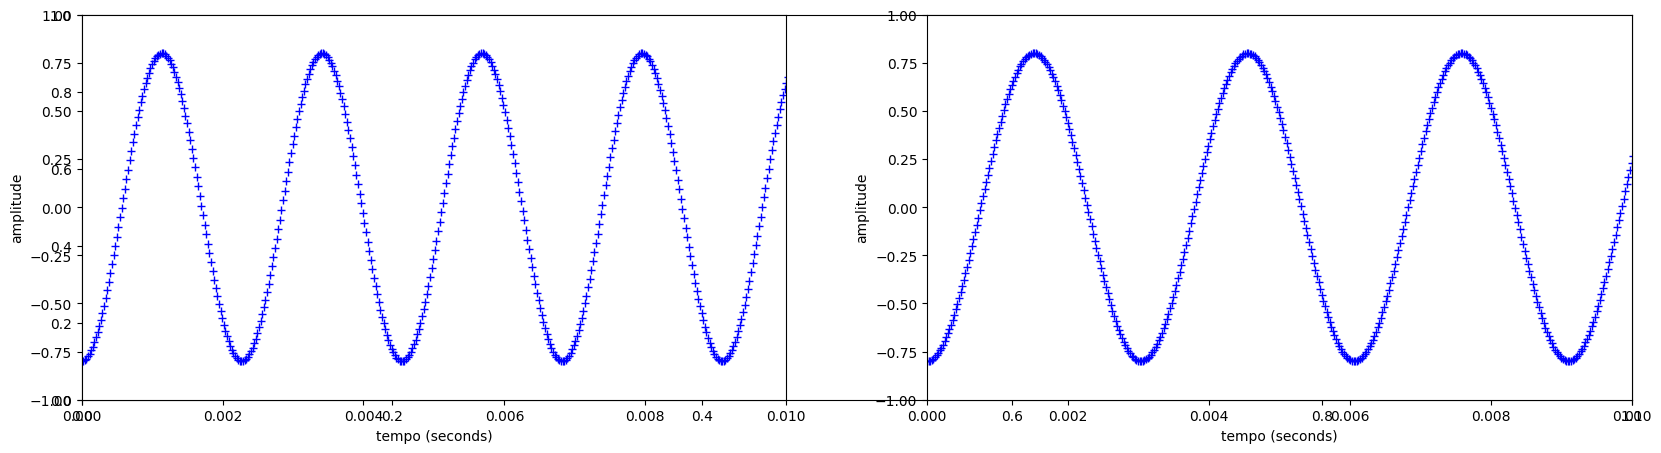

In [25]:
ipd.display(ipd.Audio(data=left_audio, rate=taxa_amostragem))
ipd.display(ipd.Audio(data=right_audio, rate=taxa_amostragem))
ipd.display(ipd.Audio(data=[left_audio, right_audio], rate=taxa_amostragem))

draw_subplot(left_time, left_audio, right_time, right_audio)

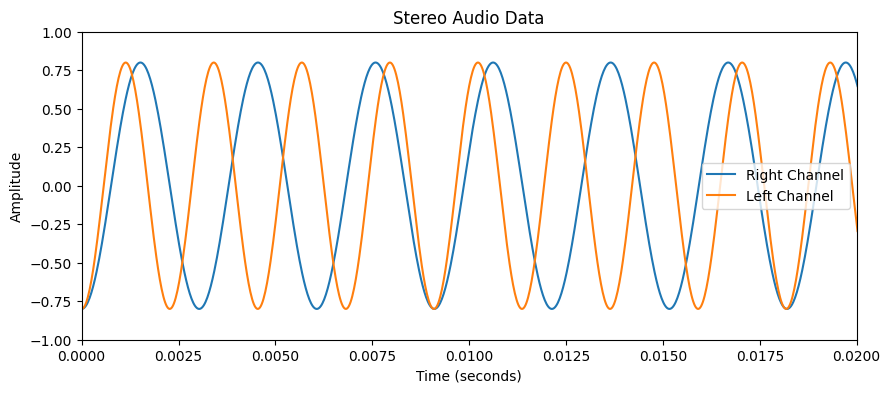

In [41]:
plt.figure(figsize=(10, 4))
plt.plot(right_time, right_audio, label='Right Channel')
plt.plot(left_time, left_audio, label='Left Channel')
plt.axis([-.0, 1/50, -1.0, 1.0])
plt.title('Stereo Audio Data From Memory')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [42]:
sample_rate = 44100
duration_seconds = 1
chunk_size = 1024
number_of_channels = 2

number_of_samples = sample_rate * duration_seconds
audio_data = np.zeros((number_of_samples, number_of_channels), dtype=np.short)

nota_la = 440.00
nota_mi = 329.63
amplitude = 32767.0
audio_data[:, 0] = amplitude * np.sin(2.0 * np.pi * nota_la * np.arange(number_of_samples) / sample_rate)
audio_data[:, 1] = amplitude * np.sin(2.0 * np.pi * nota_mi * np.arange(number_of_samples) / sample_rate)

interleaved_data = audio_data.ravel()

pcm_filename = "stereo_44100_s16.pcm"
with open(pcm_filename, "wb") as pcm_file:
    interleaved_data.tofile(pcm_file)

In [45]:
!ffmpeg -f s16le -ar 44100 -ac 2 -i stereo_44100_s16.pcm output.wav -y

ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.0 (clang-1400.0.29.202)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --dis

In [89]:
import wave

with wave.open('output.wav') as w:
    framerate = w.getframerate()
    n_samples = w.getnframes()
    channels = w.getnchannels()
    width = w.getsampwidth()
    print('sampling rate:', framerate, 'Hz')
    print('length:', n_samples, 'samples')
    print('channels:', channels)
    print('sample width:', width, 'bytes')
    
    data = w.readframes(n_samples)

n_samples = w.getnframes()
t_audio = n_samples/framerate    

sampling rate: 44100 Hz
length: 44100 samples
channels: 2
sample width: 2 bytes


In [107]:
print(len(data))
print(type(data))
data

176400
<class 'bytes'>


b'\x00\x00\x00\x00\x04\x08\x02\x06\x01\x10\x01\x0c\xee\x17\xf9\x11\xc2\x1f\xe7\x17w\'\xc7\x1d\x04/\x97#a6S)\x88=\xf7.qD\x814\x16K\xed9nQ8?uW`D$]aIub9Ncg\xe4R\xe9kaW\x03p\xac[\xacs\xc4_\xe1v\xa6c\x9eyOg\xe1{\xbej\xa7}\xf1m\xee~\xe5p\xb7\x7f\x9as\xfe\x7f\x0ev\xc5\x7f?x\x0c\x7f,z\xd2}\xd4{\x1a|7}\xe6yR~6w&\x7f\x0ft\xb3\x7fsp\xf7\x7ffl\xf3\x7f\xecg\xa7\x7f\nc\x13\x7f\xc4]7~\x1fX\x14}"R\xaa{\xd2K\xfby6E\x06xU>\xceu47Ss\xdd/\x98pU(\x9cm\xa4 cj\xd3\x18\xeef\xe9\x10>c\xed\x08W_\xe9\x009[\xe5\xf8\xe9V\xe7\xf0gR\xf8\xe8\xb6M \xe1\xdaHg\xd9\xd5C\xd6\xd1\xa9>r\xcaZ9E\xc3\xeb3T\xbc^.\xa8\xb5\xb7(F\xaf\xf9"6\xa9\'\x1d}\xa3E\x17!\x9eV\x11\'\x99]\x0b\x95\x94^\x05o\x90\\\xff\xb9\x8cZ\xf9w\x89\\\xf3\xac\x86d\xed[\x84x\xe7\x87\x82\x99\xe10\x81\xcb\xdbZ\x80\x12\xd6\x03\x80p\xd0.\x80\xea\xca\xd9\x80\x81\xc5\x04\x829\xc0\xad\x83\x15\xbb\xd4\x85\x19\xb6u\x88E\xb1\x8f\x8b\x9f\xac\x1e\x8f\'\xa8\x1e\x93\xe1\xa3\x8c\x97\xcf\x9fc\x9c\xf4\x9b\x9e\xa1P\x988\xa7\xe8\x94,\xad\xbb\x91r\xb3\xce\x8e\x06\xba\x1f\x8c\xe0\

In [108]:
signal_array = np.frombuffer(data, dtype=np.int16)

In [114]:
print(len(signal_array), len(data)//2)
print(type(signal_array))
signal_array

88200 88200
<class 'numpy.ndarray'>


array([     0,      0,   2052, ..., -21677,  -2052, -22806], dtype=int16)

In [115]:
signal_array.shape

(88200,)

In [116]:
l_channel = signal_array[0::2]
r_channel = signal_array[1::2]

In [120]:
print(len(l_channel), len(r_channel))
print(min(l_channel), max(l_channel))
print(min(r_channel), max(r_channel))

44100 44100
-32766 32766
-32766 32766


In [121]:
times = np.linspace(0, n_samples/framerate, num=n_samples)

(0.0, 0.02, -32768.0, 32767.0)

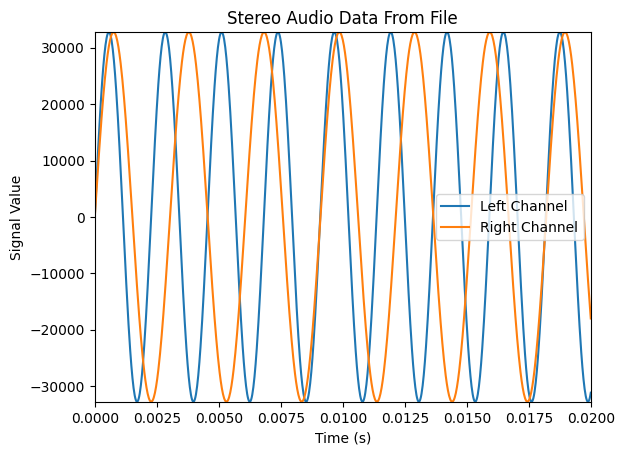

In [122]:
plt.plot(times, l_channel, label='Left Channel')
plt.plot(times, r_channel, label='Right Channel')
plt.title('Stereo Audio Data From File')
plt.ylabel('Signal Value')
plt.xlabel('Time (s)')
plt.legend()
plt.axis([0, 1/50, -32768.0, 32767.0])